---
---

#  Optimización: Descenso gradiente

---

## Preliminares: Verosimilitud de parámetros

Una de las formas más habituales de pensar en _machine learning_ es la de la máxima verosimilitud. Este concepto aparece de forma natural en el teorema de Bayes, y lo usaremos para hacer estimaciones probabilísticas de parámetros desconocidos sobre muestras aleatorias.

Supongamos que tenemos un modelo con parámetros $\pmb{\theta}$ y una colección de datos $X$. Puesto que los datos son provistos de antemano, si queremos encontrar los valores esperados de nuestros parámetros dados esos datos, nos piden simplemente encontrar

$$\text{argmax}\,P(\pmb{\theta}|X)$$

Por la regla de Bayes, esto se traduce a

$$\text{argmax}\,\frac{P(X|\pmb{\theta})\cdot P(\pmb{\theta})}{P(X)}$$

Puesto que la probabilidad $P(X)$ de generar unos determinados datos $X$ no depende de los parámetros $\pmb{\theta}$, y además no tenemos asunciones *a priori* sobre los parámetros $\pmb{\theta}$, la probabilidad $P(\pmb{\theta})$ tampoco depende de $\pmb{\theta}$, la expresión anterior se puede reducir a

$$\hat{\pmb{\theta}}=\text{argmax}\,P(X|\pmb{\theta})$$

Por convención, a la probabilidad anterior se la conoce como verosimilitud (*likelihood*). Como veremos a continuación, una práctica muy habitual al trabajar con éstas probabilidades en experimentos repetidos es que, al ser experimentos independientes, la probabilidad conjunta se pueda expresar como producto de las probabilidades de cada experimento.

> Ejemplo 1: Supongamos que tenemos un experimento en el cual $0<\theta<1$ representa la probabilidad de que, dado un determinado lanzamiento de una moneda, resulte cara (y por tanto $1-\theta$ es la probabilidad de obtener cruz). Supongamos que $X$ es un conjunto de datos donde se registran $n$ lanzamientos independientes de una moneda, donde $n_H>0$ han sido cara y $n_T>0$ han sido cruz (evidentemente $n=n_H+n_T$). Puesto que cada lanzamiento de moneda es independiente, la probabilidad conjunta la podemos expresar como:
>
> $$P(X|\theta)=\prod_{k=1}^nP(X_i|\theta)=\theta^{n_H}\cdot (1-\theta)^{n_T}$$
>
> Para encontrar el máximo de esta función con respecto de $\hat{\theta}$, un *truco* habitual es usar logaritmos antes de derivar e igualar a cero, ya que ésta es una función estrictamente creciente (y por tanto respeta los máximos y mínimos de una función) y descompone productos en sumas, que son más fáciles de derivar:
>
> $$\frac{\partial}{\partial \theta}\log{P(X|\theta)}=\frac{\partial}{\partial \theta}\left[n_h\cdot\log{\theta}+n_T\cdot\log{(1-\theta)}> \right]=\frac{n_H\cdot(1-\theta)-n_T\cdot\theta}{\theta\cdot(1-\theta)}$$
>
> Para que esta última expresión sea igual a cero, es preciso que el numerador sea cero, de donde se obtendría que
>
> $$\hat{\theta}=\frac{n_H}{n_H+n_T}$$

En efecto, a la función

$$L(\pmb{\theta})=-\log{P(X|\theta)}$$

se la conoce como *loss function* o función de pérdida. Esta función será la que tratemos de minimizar en nuestros problemas de aprendizaje ajustando convenientemente los parámetros involucrados en la misma.

En el ejemplo anterior hemos estudiado un simple caso de lo que se conocería como clasificación binaria, en el que la variable respuesta sigue una distribución de Bernoulli. En el caso de que tuviéramos un problema con $n$ posibles categorías, cada una de ellas con una correspondiente probabilidad $\{p_i\}_{i=1}^n$, de tal modo que para cada $1\leq i\leq n$ fuese $0<p_i<1$ y además $\sum_{i=1}^n p_i=1$, obtendríamos la popular función de pérdida *categorical crossentropy*:

$$L(\pmb{\theta})=L(p_1,p_2,\ldots,p_n)=-\sum_{i=1}^n p_i\cdot\log{\hat{p}_i}$$

donde $\hat{p}_i$ es cada probabilidad experimental de cada clase. En el ejemplo anterior, sería:

$$ \hat{p}_H= \frac{n_H}{n_H+n_T},\quad \hat{p}_T= \frac{n_T}{n_H+n_T}$$


> Ejemplo 2: Supongamos esta vez que queremos modelar un suceso normalmente distribuído $X\sim\mathcal{N}(\mu,\theta)$. Procedamos a calcular la expresión del estimador máximo verosímil de la media:
>
> $$
> \begin{array}{ccl}
> \log{P(X|\pmb{\theta})} & = & \log{\left(\prod_{i=1}^n P(X|\pmb{\theta}_i)\right)}\\
> & = & \log{\left(\prod_{i=1}^n \frac{1}{\sigma\sqrt{2\pi}}\exp{-\frac{(x_i-\mu)^2}{2\sigma^2}}\right)}\\
> & = & n\log{\left(\frac{1}{\sigma\sqrt{2\pi}}\right)}+\sum_{i=1}^n\left(-\frac{(x_i-\mu)^2}{2\sigma^2}\right)
> \end{array}
> $$
>
> De este modo, si hacemos los cálculos pertinentes para obtener el estimador de la media:
>
> $$ \frac{\partial}{\partial \mu}\log{P(X|\theta)}= \frac{1}{\sigma^2}\sum_{i=1}^n (x_i-\mu)=0\Rightarrow \hat{\pmb{\mu}}=\frac{1} {\sigma^2}\cdot\left(\frac{1}{n}\sum_{i=1}^n x_i\right)$$

---

## Introducción

Supongamos que tenemos una cierta función objetivo que aproximar $y(\pmb{x})$ mediante otra función parametrizada $h_{\pmb{\theta}}(\pmb{x})$. Dependiendo de la naturaleza de nuestro problema y de la modelización de la variable respuesta, en base a la técnica de máxima verosimilitud, obtendremos una determinada función de pérdida que nos hará evaluar la calidad de la aproximación, $L(\pmb{\theta})$. Con estos ingredientes, somos capaces de construir el algoritmo descenso gradiente como sigue:

1.   Se inicializan los parámetros asociados al problema; es decir, los de la función parametrizada.
2.   Se realiza el método *forward propagation* para obtener las estimaciones.
3.   Se comparan los valores reales con los de la predicción, mediante el uso de la *loss function*.
4.   De cara a analizar el peso de los parámetros en la justificación del error, se realiza el método de *backpropagation*, donde a partir de la regla de la cadena y analizando las derivadas parciales de la *loss function* obtenemos ponderaciones.
5.   Ajustamos los parámetros mediante el *learning rate*, cuyo objetivo es controlar en qué magnitud son modificados los parámetros de nuestro modelo.

Este proceso es  conocido como *método de descenso gradiente*, y es uno de los más extendidos dentro de toda la IA. A lo largo de este proceso, hemos comentado unos cuantos conceptos que no han sido convenientemente introducidos, y que vamos a introducir mediente un ejemplo.

---
# Ejemplo: Modelo lineal

Consideremos la siguiente muestra aleatoria de datos, donde el plano $XY$ se corresponde a las variables, y el eje $Z$ a las etiquetas:

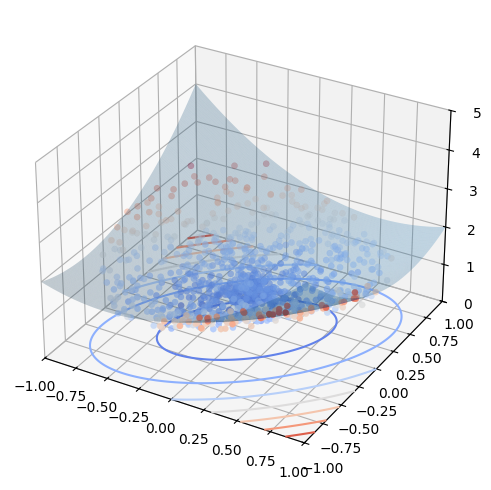

In [1]:
# Requerimientos
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Función potencial
plot_fn = lambda x,y: 1+x**2+y**2-x*y

# Creamos mallado
x_real = np.linspace(-1, 1, 1000)
y_real = np.linspace(-1, 1, 1000)
X,Y = np.meshgrid(x_real, y_real)
Z = plot_fn(X, Y).T

# Creamos puntos aleatorios con ruido
theta = 2 * np.pi * np.random.random(1000)
r = 1 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
epsilon = .1 * np.random.randn(1000)
z = plot_fn(x, y) + epsilon

# Dibujamos
fig_1 = plt.figure(figsize=(10,6))
ax = fig_1.add_subplot(1,1,1, projection='3d')
## Grid real
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=0, cmap=matplotlib.cm.coolwarm)
## Puntos
ax.scatter(x, y, z, c=z, cmap=matplotlib.cm.coolwarm, linewidth=0.2)
## Configuración ejes
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(0, 5)
plt.show()

Es claro que los datos presentan una muy alta relación (dado por la ecuación $z=1+x^2+y^2-xy$). Por métodos de mínimos cuadrados, podemos encontrar una solución analítica a este sistema de encontrar el mejor hiperplano que minimice la distancia a los puntos de $z=a+bx+cy$. Sin embargo, en el ámbito del *Machine Learning*, dichos parámetros se estudian a través de lo que se conoce como *loss function* mediante el método de máxima verosimilitud.

## Descripción

Consideraremos el caso en el que nuestra función objetivo va a depender linealmente de las variables de entrada, y donde *las incógnitas son los parámetros*:

$$
h(\mathbf{\theta}) := h(\theta_0,\theta_1,\ldots,\theta_n) = \theta_0+\sum_{i=1}^n\theta_i x_i\quad (1)
$$

Equivalentemente, podemos escribir en términos matriciales:

$$h(\mathbf{\theta})  = \left(\begin{array}{cccc}1 & x_1 &  \ldots &  x_n\end{array}\right)  \left(\begin{array}{c}\theta_0 \\ \theta_1 \\\vdots \\ \theta_n\end{array}\right)  =X\mathbf{\theta}$$

Como ya indicamos, la solución *analítica* por mínimos cuadrados del problema se puede expresar como:

$$y(\mathbf{x}) := y(x_1,x_2,\ldots,x_n) = a_0+\sum_{i=1}^na_i x_i +\varepsilon = X\mathbf{A} + \varepsilon, \quad \varepsilon\sim\mathcal{N}(0,\sigma^2))$$

donde la matriz de coeficientes se calcula como:

$$\mathbf{A}=(X^tX)^{-1}(X^ty)$$

Además, dada una predicción, tomaremos como *loss function* la media cuadrática dividida entre dos (para que los gradientes queden simplificados), y como función de coste total del entrenamiento la media de las mismas:

$$J(\mathbf{\theta})=\frac{1}{2m}\sum_{i=1}^m(h(\mathbf{\theta})^{(i)}-y(\mathbf{x})^{(i)})^2\quad (2)$$

De cara a ponderar las fuentes del error, obtenemos el gradiente de la función *J* con respecto de sus parámetros. Concretamente, sus derivadas parciales son:

$$\frac{\partial J}{\partial \theta_j}(\mathbf{\theta})=\frac{1}{m}\sum_{i=1}^m(h(\mathbf{\theta})^{(i)}-y(\mathbf{x})^{(i)})·x_j\quad (3)$$

Una vez obtenida esta cantidad, actualizamos los valores de nuestros parámetros a partir del *learning rate*:

$$\theta_j\mapsto \theta_j-\alpha\frac{\partial J}{\partial \theta_j}(\mathbf{\theta})\quad (4)$$

En función del tamaño del parámetro *alpha*, se obtendrán unas estimaciones u otras, y por tanto el algoritmo convergerá de formas distintas, por lo que su elección y modificación durante el proceso es fundamental.

## Implementación manual

Veremos a continuación cómo implementar el proceso anterior con nuestros propios recursos, teniendo en cuenta que para operar en términos generales debemos recurrir al cálculo matricial. De hecho, implementaremos una función que haga todo este proceso de manera automática:

In [10]:
def OLE_gradient_descent(X, y, test_split = .2, tolerance = 1e-05, lr = .1, epochs = 100, dtype = 'float'):
    # Fijamos el tipo de datos
    dtype_ = np.dtype(dtype)
    # Convertimos X e y en np.array
    X, y = np.array(X, dtype=dtype_), np.array(y, dtype=dtype_)
    if X.shape[0] != y.shape[0]:
      raise ValueError("'X' and 'y' lengths do not match")
    # Fijamos y comprobamos el valor del radio de aprendizaje
    lr = np.array(lr, dtype=dtype_)
    if np.any(lr <= 0):
        raise ValueError("'learn_rate' must be greater than zero")
    # Fijamos y comprobamos el valor del número de iteraciones
    epochs = int(epochs)
    if epochs <= 0:
        raise ValueError("'epochs' must be greater than zero")
    # Fijamos y comprobamos el valor de la tolerancia
    tolerance = np.array(tolerance, dtype=dtype_)
    if np.any(tolerance <= 0):
        raise ValueError("'tolerance' must be greater than zero")
    # Comenzamos con el algoritmo
    X = np.concatenate((np.ones((X.shape[0],1)),X), axis = 1) # Añadimos unos al principio para contemplar el parámetro theta_0
    n = X.shape[1] # Parámetros del modelo
    m = X.shape[0] # Nº de elementos de nuestros datos
    Y = y.reshape(m,1)
    theta = np.random.normal(loc=0, scale=.05, size=(n)) # Inicializamos parámetros
    nabla_size = [] # Inicializamos tamaño gradiente
    mse_train = [] # Inicializamos error entrenamiento
    mse_test = [] # Inicializamos error test
    # Dividimos datos
    train_idx = np.random.choice(np.arange(X.shape[0]), size = int(X.shape[0]*(1-test_split)))
    X_train, X_test, y_train, y_test = X[train_idx,:], X[~train_idx,:],Y[train_idx,:], Y[~train_idx,:]
    # Descenso gradiente
    for i in range(epochs):
        h = np.dot(X,theta.reshape(-1,1)) # Valores dependientes de los parámetros
        nabla = 1/m*np.dot(X.transpose(),h-Y).flatten()
        nabla_size.append(np.sqrt(np.sum(nabla**2)))
        theta = theta-lr*nabla # Actualizamos valores con el gradiente
        mse_train.append(1/m*np.sum((np.dot(X_train, theta)-y_train)**2))
        mse_test.append(1/m*np.sum((np.dot(X_test, theta)-y_test)**2))
        # Comprobar la tolerancia del modelo
        if np.all(np.abs(-lr*nabla) <= tolerance):
            break
    return theta, np.array(mse_train), np.array(mse_test), nabla, np.array(nabla_size)

Resumimos todo el proceso:

In [11]:
# Crear datos
X_model = np.concatenate((x.reshape(-1,1),y.reshape(-1,1)), axis = 1)
z = z.reshape(-1,1)
# Modelo
epochs = 100
lr = .05
theta, mse_train, mse_test, nabla, nabla_size = OLE_gradient_descent(X_model, z, test_split = .5, tolerance = 1e-05, lr = lr, epochs = epochs, dtype = 'float')
#Obtenemos el resultado
print('La mejor aproximación lineal encontrada es y={theta_0:.2f}+{theta_1:.2f}·x_1+{theta_2:.2f}·x_2'.format(theta_0=theta[0], theta_1=theta[1], theta_2=theta[2]))
## Dibujamos
#fig_2 = plt.figure(figsize = (10,6))
#ax = fig_2.add_subplot(1,1,1, projection='3d')
### Mallado mejor aproximación lineal
#X1 = np.linspace(-1, 1, 1000)
#X2 = np.linspace(-1, 1, 1000)
#X1, X2 = np.meshgrid(X1, X2)
#Z_plane = (theta[0]+theta[1]*X1+theta[2]*X2).T
### Plano
#ax.contour3D(X1,X2,Z_plane, 30, cmap='binary')
### Superficie
#ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
### Puntos
#ax.scatter(X_model[:,0], X_model[:,1], z, c=z, cmap=matplotlib.cm.coolwarm, linewidth=0.5)
#plt.show()

La mejor aproximación lineal encontrada es y=1.32+-0.02·x_1+-0.03·x_2


## *Bias-Variance tradeoff*

Como ya vimos en el apartado anterior, una parte de los datos es reservada para validar la efectividad del modelo. En este caso, adaptamos la función anterior para que nos devuelva los *MSE* de cada iteración tanto de los datos de entrenamiento como de los datos test, que se separan aleatoriamente:

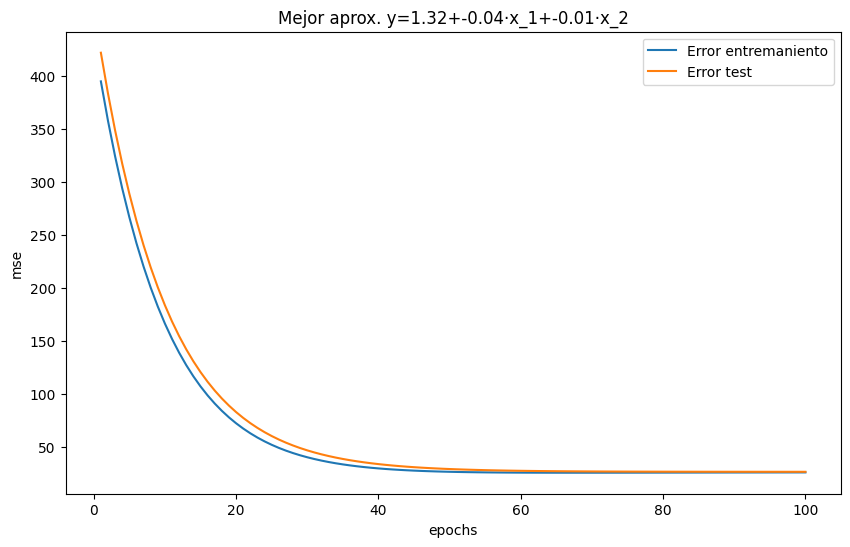

In [4]:
# Dibujamos errores entrenamiento y test
fig_3 = plt.figure(figsize = (10,6))
ax = fig_3.add_subplot(1,1,1)
ax.plot(np.arange(1,len(mse_train)+1), mse_train, label = "Error entremaniento")
ax.plot(np.arange(1,len(mse_test)+1), mse_test, label = "Error test")
ax.set_xlabel('epochs')
ax.set_ylabel('mse')
ax.set_title('Mejor aprox. y={theta_0:.2f}+{theta_1:.2f}·x_1+{theta_2:.2f}·x_2'.format(theta_0=theta[0], theta_1=theta[1], theta_2=theta[2]))
ax.legend()
plt.show()

Observamos que el error cometido en los datos de entrenamiento y datos test es bastante parejo, lo cual indica dos cosas: la ausencia de *outliers* en los datos test, y que el modelo responde a la complejidad de los datos adecuadamente.

Para ir un paso más allá en nuestro análisis, si analizamos detenidamente la métrica *mean squared error* que utilizamos previamente como función pérdida, vemos que se puede escribir como sigue:

$$\mathbb{E}\left[(h(\mathbf{\theta})-y)^2\right]=\left(\mathbb{E}[h(\mathbf{\theta})-y]\right)^2+\mathbb{E}\left[(h(\mathbf{\theta})-\mathbb{E}[h(\mathbf{\theta})])^2\right] + \sigma_{\varepsilon}^2\quad (5)$$

El primero de estos dos términos es la desviación de los valores de la estimación respecto de su media; es decir, el **bias** al cuadrado. El segundo es la **varianza** del estimador, y el tercero corresponde a un error irreducible que se desprende de la propia naturaleza del modelo. Con el siguiente cuadro podemos entender la relación que existe entre las mismas:

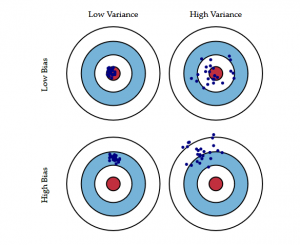

Tanto la complejidad del modelo que usemos, como el tipo de datos de entrenamiento o la elección de los parámetros del modelo son algunas de las condiciones que afectan a la interacción de ambas variables. Reconocemos ahora algunas de las principales patologías de los modelos:

*   Si la diferencia entre el error cometido en los datos de entrenamiento y test es muy grande, o equivalentemente un modelo con un *bias* muy reducido y gran varianza, se está produciendo lo que se conoce como *overfitting*, y consiste en que el modelo está demasiado optimizado para los datos de entrenamiento y es poco robusto frente a valores atípicos.
*   Si ambos errores son muy altos, o bien si el *bias* del modelo es muy grande, se produce el fenómeno de *underfitting*, que consiste en que nuestro modelo no es capaz de capturar la complejidad de los datos, y por tanto debemos de escoger un modelo o estrategia más adecuados.

En lo relativo al primer problema, la solución pasa por lo que se conocen como **técnicas de regularización**, que veremos más adelante.

Para estudiar estos últimos parámetros de un modelo, podemos describirlos como:

$$\text{Var}(\mathbf{\theta})=\sigma^2(X^tX)^{-1},\,\text{Bias}(\mathbf{\theta})=\mathbb{E}[\mathbf{\theta}]-A$$

donde el parámetro $\sigma$ se estima por:

$$\hat{\sigma}^2=\frac{(y-h)^t(y-h)}{m-n}$$

## *Vanishing gradient*

En la actualización de los valores de los parámetros que aparece en la ecuación $(4)$ observamos que la actualización de los parámetros del modelo se hace en base a dos criterios:

* La **magnitud** del gradiente.
* El factor de aprendizaje.

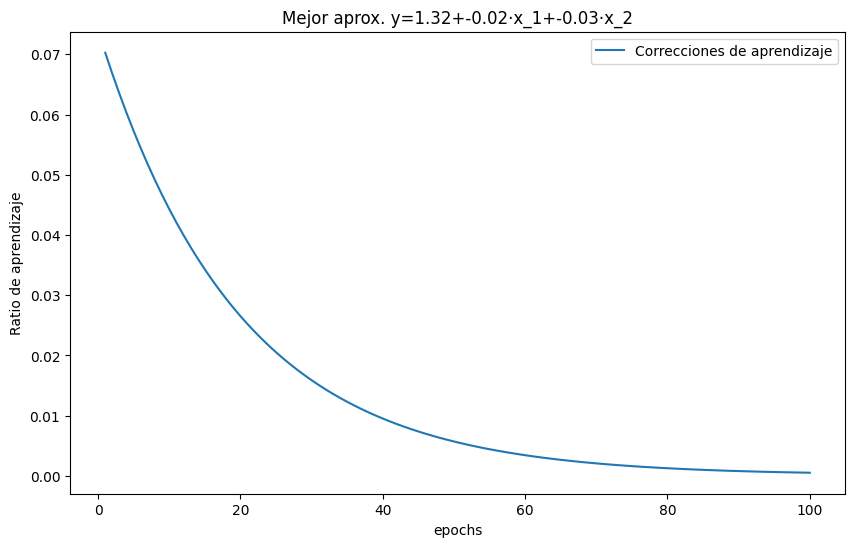

In [12]:
# Veamos cuál ha sido el tamaño de las correcciones de aprendizaje
fig_4 = plt.figure(figsize = (10,6))
ax = fig_4.add_subplot(1,1,1)
ax.plot(np.arange(1,len(nabla_size)+1), lr*nabla_size, label = "Correcciones de aprendizaje")
ax.set_xlabel('epochs')
ax.set_ylabel('Ratio de aprendizaje')
ax.set_title('Mejor aprox. y={theta_0:.2f}+{theta_1:.2f}·x_1+{theta_2:.2f}·x_2'.format(theta_0=theta[0], theta_1=theta[1], theta_2=theta[2]))
ax.legend()
plt.show()

Mientras que el segundo valor es controlable, el primero depende de la inicialización de las variables del modelo y es imposible llegar a controlarlo, por lo que en la práctica esta versión del algoritmo no controla adecuadamente a qué ritmo *aprende* el modelo. Además, su decrecimiento puede volverse muy acelerado, especialmente cuando concatenamos bloques de capas parametrizadas (sujeto del aprendizaje profundo), fenómeno conocido como *desvanecimiento del gradiente*.

El gradiente nos indica en qué dirección debemos aplicar el aprendizaje de parámetros, pero no es una práctica conveniente dejar que tenga impacto en la magnitud del mismo. En su lugar, se suele realizar la siguiente práctica:

* Se estandariza el tamaño del gradiente (técnica conocida como *gradient clipping*).
* La otra variable, el factor de aprendizaje, se le permite tomar valores variables con lo que se conoce como un *learning rate scheduler*.

De este modo, el aprendizaje puede llegar a ser variable, pero en todo momento es controlado. Por simplicidad, en este código lo mantendremos constante, pero puede modelizarse de múltiples formas:

* Técnicas de amortiguación como *warm start* y *cold restart*.
* Técnicas de validación basadas en métricas.
* Decaimiento exponencial.
* Modelado periódico.

In [13]:
def OLE_gradient_descent(X:np.array,
                         y:np.array,
                         test_split:float = .2,
                         tolerance:float = 1e-05,
                         lr:float = .1,
                         epochs:int = 100,
                         dtype:str = 'float',
                         seed:int = 123,
                         ):
    # Fijamos semilla para controlar aleatoriedad
    np.random.seed(seed)
    # Fijamos el tipo de datos
    dtype_ = np.dtype(dtype)
    # Convertimos X e y en np.array
    X, y = np.array(X, dtype=dtype_), np.array(y, dtype=dtype_)
    if X.shape[0] != y.shape[0]:
      raise ValueError("'X' and 'y' lengths do not match")
    # Fijamos y comprobamos el valor del radio de aprendizaje
    lr = np.array(lr, dtype=dtype_)
    if np.any(lr <= 0):
        raise ValueError("'learn_rate' must be greater than zero")
    # Fijamos y comprobamos el valor del número de iteraciones
    epochs = int(epochs)
    if epochs <= 0:
        raise ValueError("'epochs' must be greater than zero")
    # Fijamos y comprobamos el valor de la tolerancia
    tolerance = np.array(tolerance, dtype=dtype_)
    if np.any(tolerance <= 0):
        raise ValueError("'tolerance' must be greater than zero")
    # Comenzamos con el algoritmo
    X = np.concatenate((np.ones((X.shape[0],1)),X), axis = 1) # Añadimos unos al principio para contemplar el parámetro theta_0
    n = X.shape[1] # Parámetros del modelo
    m = X.shape[0] # Nº de elementos de nuestros datos
    Y = y.reshape(m,1)
    theta = np.random.normal(loc=0, scale=.05, size=(n)) # Inicializamos parámetros
    mse_train = [] # Inicializamos error entrenamiento
    mse_test = [] # Inicializamos error test
    # Dividimos datos
    train_idx = np.random.choice(np.arange(X.shape[0]), size = int(X.shape[0]*(1-test_split)))
    X_train, X_test, y_train, y_test = X[train_idx,:], X[~train_idx,:],Y[train_idx,:], Y[~train_idx,:]
    # Descenso gradiente
    for i in range(epochs):
        h = np.dot(X,theta.reshape(-1,1)) # Valores dependientes de los parámetros
        nabla = 1/m*np.dot(X.transpose(),h-Y).flatten() # Calculamos gradiente
        nabla /= np.sqrt(np.sum(nabla**2)) # Normalizamos gradiente
        theta = theta-lr*nabla # Actualizamos valores con el gradiente
        mse_train.append(1/m*np.sum((np.dot(X_train, theta)-y_train)**2))
        mse_test.append(1/m*np.sum((np.dot(X_test, theta)-y_test)**2))
        # Comprobar la tolerancia del modelo
        if np.all(np.abs(-lr*nabla) <= tolerance):
            break
    return theta, np.array(mse_train), np.array(mse_test), nabla

Veamos cómo se entrena ahora el modelo:

La mejor aproximación lineal encontrada es y=1.35+-0.04·x_1+-0.00·x_2


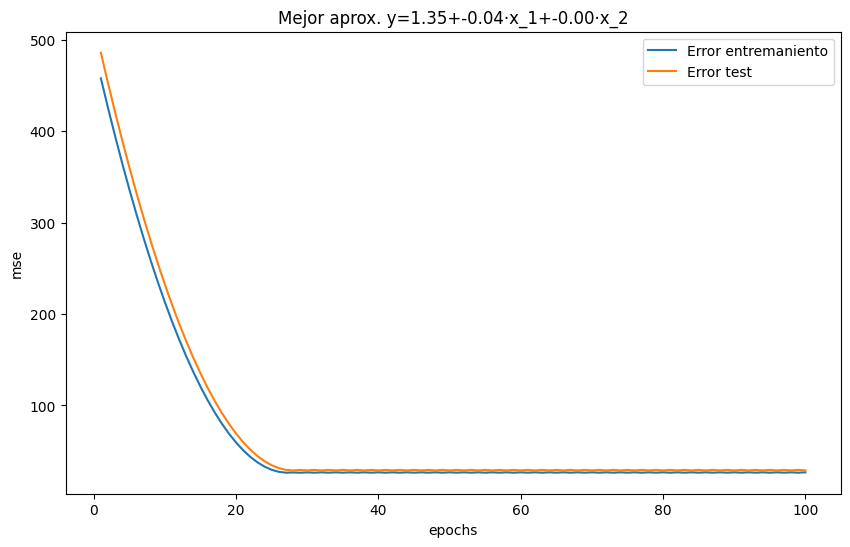

In [14]:
# Modelo
epochs = 100
lr = .05
theta, mse_train, mse_test, nabla = OLE_gradient_descent(X_model, z, test_split = .5, tolerance = 1e-05, lr = lr, epochs = epochs, dtype = 'float', seed = 123)
#Obtenemos el resultado
print('La mejor aproximación lineal encontrada es y={theta_0:.2f}+{theta_1:.2f}·x_1+{theta_2:.2f}·x_2'.format(theta_0=theta[0], theta_1=theta[1], theta_2=theta[2]))
# Dibujamos errores entrenamiento y test
fig_5 = plt.figure(figsize = (10,6))
ax = fig_5.add_subplot(1,1,1)
ax.plot(np.arange(1,len(mse_train)+1), mse_train, label = "Error entremaniento")
ax.plot(np.arange(1,len(mse_test)+1), mse_test, label = "Error test")
ax.set_xlabel('epochs')
ax.set_ylabel('mse')
ax.set_title('Mejor aprox. y={theta_0:.2f}+{theta_1:.2f}·x_1+{theta_2:.2f}·x_2'.format(theta_0=theta[0], theta_1=theta[1], theta_2=theta[2]))
ax.legend()
plt.show()

Como podemos comprobar, la convergencia es **mucho más rápida** cuando disponemos de control sobre la magnitud del aprendizaje.

## *Early stopping*

En el método inicial, hemos puesto una condición de parada en el hecho de que el tamaño del gradiente fuese lo suficientemente pequeño. Esto, sin embargo, no tiene por qué ser indicativo de una convergencia exitosa, y en el *arreglo* del apartado anterior ya se vuelve un criterio inútil dado que hemos normalizado su tamaño.

En su lugar, es conveniente tener en cuenta el comportamiento del error cuadrático en los datos de *test*, par ano llevar a nuestro modelo a un escenario de **sobreajuste** a los datos de entrenamiento, perdiendo así capacidad de generalización. Para ello, lo que haremos será implementar el algoritmo de forma que si, en $n$ épocas no se produce una mejora de nuestra métrica en un porcentaje $\alpha$, se detenga el entrenamiento:

In [16]:
def OLE_gradient_descent(X:np.array,
                         y:np.array,
                         test_split:float = .2,
                         lr:float = .05,
                         epochs:int = 100,
                         early_stopping_patience:int=3,
                         early_stopping_alpha:float=.01,
                         dtype:str = 'float',
                         seed:int = 123,
                         ):
    # Fijamos semilla para controlar aleatoriedad
    np.random.seed(seed)
    # Fijamos el tipo de datos
    dtype_ = np.dtype(dtype)
    # Convertimos X e y en np.array
    X, y = np.array(X, dtype=dtype_), np.array(y, dtype=dtype_)
    if X.shape[0] != y.shape[0]:
      raise ValueError("'X' and 'y' lengths do not match")
    # Fijamos y comprobamos el valor del radio de aprendizaje
    lr = np.array(lr, dtype=dtype_)
    if np.any(lr <= 0):
        raise ValueError("'learn_rate' must be greater than zero")
    # Fijamos y comprobamos el valor del número de iteraciones
    epochs = int(epochs)
    if epochs <= 0:
        raise ValueError("'epochs' must be greater than zero")
    # Fijamos y comprobamos el valor de early_stopping_alpha
    early_stopping_alpha = np.array(early_stopping_alpha, dtype=dtype_)
    if np.any(early_stopping_alpha <= 0):
        raise ValueError("'early_stopping_alpha' must be greater than zero")
    # Comenzamos con el algoritmo
    X = np.concatenate((np.ones((X.shape[0],1)),X), axis = 1) # Añadimos unos al principio para contemplar el parámetro theta_0
    n = X.shape[1] # Parámetros del modelo
    m = X.shape[0] # Nº de elementos de nuestros datos
    Y = y.reshape(m,1)
    theta = np.random.normal(loc=0, scale=.05, size=(n)) # Inicializamos parámetros
    mse_train = [] # Inicializamos error entrenamiento
    mse_test = [] # Inicializamos error test
    best_mse_test = np.inf # Inicializamos criterio parada en infinito porque la métrica es decreciente
    best_mse_patience = 0
    # Dividimos datos
    train_idx = np.random.choice(np.arange(X.shape[0]), size = int(X.shape[0]*(1-test_split)))
    X_train, X_test, y_train, y_test = X[train_idx,:], X[~train_idx,:],Y[train_idx,:], Y[~train_idx,:]
    # Descenso gradiente
    for i in range(epochs):
        h = np.dot(X,theta.reshape(-1,1)) # Valores dependientes de los parámetros
        nabla = 1/m*np.dot(X.transpose(),h-Y).flatten() # Calculamos gradiente
        nabla /= np.sqrt(np.sum(nabla**2)) # Normalizamos gradiente
        theta = theta-lr*nabla # Actualizamos valores con el gradiente
        mse_train.append(1/m*np.sum((np.dot(X_train, theta)-y_train)**2))
        mse_test.append(1/m*np.sum((np.dot(X_test, theta)-y_test)**2))
        # Comprobar la condición de parada
        if mse_test[i]<(1-early_stopping_alpha)*best_mse_test:
            best_mse_test = mse_test[i]
            best_mse_patience = 0
        else:
            best_mse_patience += 1
        if best_mse_patience>=early_stopping_patience:
            break
    return theta, np.array(mse_train), np.array(mse_test), nabla

Por defecto, pondremos como pasos de paciencia tres y como porcentaje de mejora un $1$%. Veamos cómo funciona ahora:

La mejor aproximación lineal encontrada es y=1.30+-0.03·x_1+-0.00·x_2


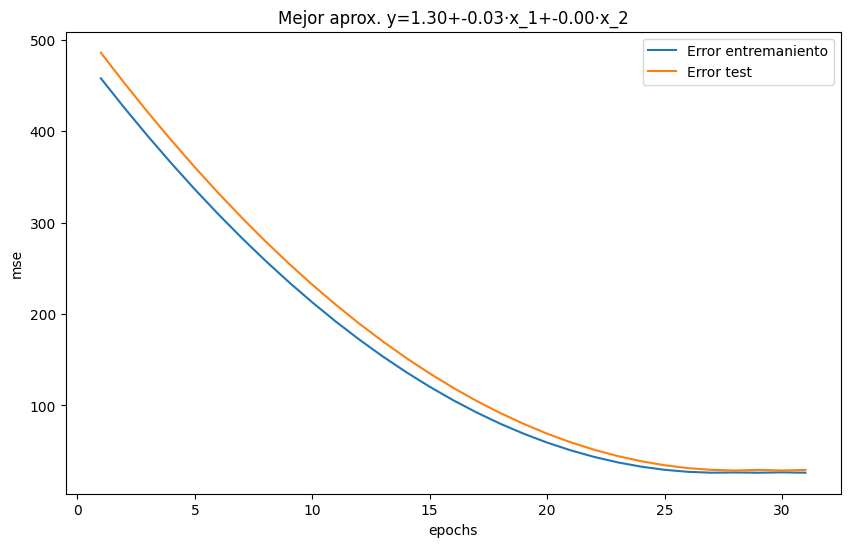

In [17]:
# Modelo
epochs = 1000
lr = .05
theta, mse_train, mse_test, nabla = OLE_gradient_descent(X_model,
                                                         z,
                                                         test_split = .5,
                                                         lr = lr,
                                                         epochs = epochs,
                                                         early_stopping_patience = 3,
                                                         early_stopping_alpha=.01,
                                                         dtype = 'float',
                                                         seed = 123,
                                                         )
#Obtenemos el resultado
print('La mejor aproximación lineal encontrada es y={theta_0:.2f}+{theta_1:.2f}·x_1+{theta_2:.2f}·x_2'.format(theta_0=theta[0], theta_1=theta[1], theta_2=theta[2]))
# Dibujamos errores entrenamiento y test
fig_6 = plt.figure(figsize = (10,6))
ax = fig_6.add_subplot(1,1,1)
ax.plot(np.arange(1,len(mse_train)+1), mse_train, label = "Error entremaniento")
ax.plot(np.arange(1,len(mse_test)+1), mse_test, label = "Error test")
ax.set_xlabel('epochs')
ax.set_ylabel('mse')
ax.set_title('Mejor aprox. y={theta_0:.2f}+{theta_1:.2f}·x_1+{theta_2:.2f}·x_2'.format(theta_0=theta[0], theta_1=theta[1], theta_2=theta[2]))
ax.legend()
plt.show()

De este modo, hemos conseguido también prevenir que nuestro modelo se sobreajuste a los datos en base  un criterio técnico, a la vez que controlamos el factor de aprendizaje, y son necesarias sólo 30 épocas para conseguir nuestro objetivo.

## *Stochastic Gradient Descent*
Analizaremos ahora una técnica de optimización extremadamente eficaz para acelerar nuestros algoritmos y convertirlos en métodos más eficientes, mediante una familia de métodos conocida como **estocásticos**.

Como hemos estudiado, nuestro objetivo consiste en minimizar una cierta función de coste, que viene dada como una suma finita de otras cantidades (lo que conocemos como función pérdida o *loss function*). En el caso que abordamos antes, se trata de la función:

$$J(y,h)=\frac{1}{n}\sum_{i=1}^n(y_i-h^{(i)})^2=\frac{1}{n}\sum_{i=1}^nJ_i(y_i,h^{(i)})$$

donde $n$ denota la magnitud de los datos. Teniendo en cuenta que el coste computacional del cálculo del gradiente incrementa de forma lineal con respecto al tamaño de los datos, es muy habitual vernos desbordados por el cálculo del mismo con datos *reales*.

Para remediar este problema, consideramos una **partición** finita del rango de la muestra, que matemáticamente lo describimos como:

$$\mathcal{B}:=\{B_k\}_{k=1}^b\subset\mathcal{P}(\{1,\ldots,n\})\quad\cup_{k=1}^bB_k=\{1.\ldots,n\},\,\cap_{k=1}^b B_k=\emptyset$$

Para cada una de estas familias, aplicamos el proceso anterior, dando así lugar al método conocido como *mini-batch stochastic gradient descent*, en el que en cada *epoch* o iteración aplicamos *k* veces el proceso de aprendizaje:

$$\theta\mapsto\theta-\alpha\left(\frac{1}{|B_k|}\nabla J|_{B_k}(y,h)\right)$$

Este método posee numerosas ventajas:

*   Reduce la complejidad del problema a un incremento lineal con respecto del tamaño de los *batches*.
*   Es un estimador balanceado:

$$\mathbb{E}_{\mathcal{B}}\nabla J_{\mathcal{B}}(y,h)=\nabla J(y,h)$$

*   Esta técnica posee un **efecto regularizante**, especialmente cuando el volumen de datos es muy grande.
*   Cuando el conjunto de datos posee muchos registros similares, las estimaciones del gradiente son muy cercanas al valor real.

Es claro entonces que una elección apropiada de la partición se convierte en un hecho fundamental para que el algoritmo funcione de la manera más eficiente posible.

## Implementación final

Adaptaremos ahora nuestra clase de entrenamiento y predicción de modelos a la técnica anteriormente descrita:

In [22]:
# Requerimientos
from typing import List
import numpy as np
import pandas as pd

# Clase
class OLE_Gradient_Descent():
    def __init__(self,
                 batch_size:int = 64,
                 epochs:int = 50,
                 lr:float = 5e-3,
                 train_val_test_split:List[float] = [.5, .4, .1],
                 early_stopping_patience:int = 3,
                 early_stopping_alpha:float = .01,
                 dtype:str = 'float',
                 seed:int = 123,
                 ):
        # Fijamos semilla para controlar aleatoriedad
        np.random.seed(seed)

        # Validaciones
        ## Fijamos y comprobamos el valor del radio de aprendizaje
        lr = np.array(lr, dtype=np.dtype(dtype))
        if np.any(lr <= 0):
            raise ValueError("'learn_rate' must be greater than zero")
        ## Fijamos y comprobamos el valor del número de iteraciones
        epochs = int(epochs)
        if epochs <= 0:
            raise ValueError("'epochs' must be greater than zero")
        ## Fijamos y comprobamos el valor de early_stopping_alpha
        early_stopping_alpha = np.array(early_stopping_alpha, dtype=np.dtype(dtype))
        if np.any(early_stopping_alpha <= 0):
            raise ValueError("'early_stopping_alpha' must be greater than zero")

        ## Asignación de parámetros
        self.bs = batch_size
        self.epochs = epochs
        self.lr = lr
        self.esp = early_stopping_patience
        self.esa = early_stopping_alpha
        self.train_val_test_split = train_val_test_split
        self.dtype_ = np.dtype(dtype)


    def fit(self,
            X:np.array,
            y:np.array,
            ):
        # Convertimos X e y en np.array
        X, y = np.array(X, dtype=self.dtype_), np.array(y, dtype=self.dtype_)
        if X.shape[0] != y.shape[0]:
          raise ValueError("'X' and 'y' lengths do not match")
        # Comenzamos con el algoritmo
        X = np.concatenate((np.ones((X.shape[0],1)),X), axis = 1) # Añadimos unos al principio para contemplar el parámetro theta_0
        n = X.shape[1] # Parámetros del modelo
        m = X.shape[0] # Nº de elementos de nuestros datos
        Y = y.reshape(m,1)
        data = np.concatenate((X, Y), axis=1) # Concatenamos los datos
        theta = np.random.normal(loc=0, scale=.05, size=(n)) # Inicializamos parámetros
        mse_tracker = pd.DataFrame({'train':[], 'val':[], 'test':[]})
        best_mse_val = np.inf # Inicializamos criterio parada en infinito porque la métrica es decreciente
        best_mse_patience = 0
        # Dividimos datos
        train_idx = np.random.choice(np.arange(X.shape[0]), size = int(X.shape[0]*self.train_val_test_split[0]))
        val_idx = np.random.choice([elem for elem in np.arange(X.shape[0]) if elem not in train_idx], size = int(X.shape[0]*self.train_val_test_split[1]/(self.train_val_test_split[1]+self.train_val_test_split[2])))
        test_idx = [elem for elem in np.arange(X.shape[0]) if elem not in np.concatenate((train_idx, val_idx))]
        train_data, val_data, test_data = data[train_idx,:], data[val_idx,:], data[test_idx,:]
        # Descenso gradiente
        print(f"Entrenamos datos en partición train-val")
        for idx in range(epochs):
            np.random.shuffle(data) # Operación inplace para barajar datos de entrenamiento
            # Bucle sobre datos de entrenamiento
            theta, mse_tracker = self._train_one_epoch(train_data, theta, mse_tracker, idx)
            # Bucle sobre datos de validación
            mse_tracker = self._evaluate_data(val_data, theta, mse_tracker, 'val')
            # Comprobar la condición de parada
            if mse_tracker.iloc[-1,1]<(1-self.esa)*best_mse_val:
                best_mse_val = mse_tracker.iloc[-1,1]
                best_mse_patience = 0
            else:
                best_mse_patience += 1
            if best_mse_patience>=self.esp:
                break
        print(f"Comprobamos generalización en partición test")
        mse_tracker = self._evaluate_data(test_data, theta, mse_tracker, 'test')
        return theta, mse_tracker


    def _train_one_epoch(self, train_data, theta, mse_tracker, idx):
        mse_train = [] # Acumulamos mse de entrenamiento
        # Bucle de entrenamiento
        for batch in np.array_split(train_data, len(train_data)//self.bs+1):
            X, Y = batch[:,:-1], batch[:,-1].reshape(-1,1)
            h = np.dot(X,theta.reshape(-1,1)) # Valores dependientes de los parámetros
            nabla = 1/len(batch)*np.dot(X.transpose(),h-Y).flatten() # Calculamos gradiente
            nabla /= np.sqrt(np.sum(nabla**2)) # Normalizamos gradiente
            theta = theta-self.lr*nabla # Actualizamos valores con el gradiente
            mse_train.append(1/len(X)*np.sum((np.dot(X, theta)-Y)**2))
        mse_tracker = pd.concat([mse_tracker, pd.DataFrame({'train':np.mean(mse_train), 'val':np.nan, 'test':np.nan}, index=[idx])], axis=0)
        return theta, mse_tracker


    def _evaluate_data(self, val_data, theta, mse_tracker, flag):
        assert flag in ['val', 'test'], f"Data can only be validates in either 'val' or 'test' partitions."
        preds = [] # Lista para acumular predicciones
        # Bucle para acumular predicciones
        for batch in np.array_split(val_data, len(val_data)//self.bs+1):
            X, Y = batch[:,:-1], batch[:,-1].reshape(-1,1)
            preds.append(np.dot(X,theta.reshape(-1,1)).flatten())
        # Calculamos las métricas sobre todas las predicciones
        preds = np.concatenate(preds)
        mse_tracker.iloc[-1,1 if flag=='val' else 2] = 1/len(val_data)*np.sum((preds-val_data[:,-1].reshape(-1))**2)
        return mse_tracker

Pongamos a prueba este método:

In [23]:
# Creamos una muestra más grande
x = np.linspace(-1, 1, 10000).reshape(-1,1)
y = np.linspace(-1, 1, 10000).reshape(-1,1)
X_model = np.concatenate((x,y), axis=-1)
z = plot_fn(x,y)
linear_model = OLE_Gradient_Descent()

In [24]:
theta, history = linear_model.fit(X_model, z)

Entrenamos datos en partición train-val
Comprobamos generalización en partición test


In [25]:
history

,train,val,test
0,95.731539,1.090724,NaN
1,46.502812,0.460354,NaN
2,16.804071,0.138151,NaN
3,6.187448,0.090101,NaN
4,5.654854,0.090075,NaN
5,5.654765,0.090074,NaN
6,5.654765,0.090074,0.088946


¡En tan sólo 6 épocas hemos alcanzado la condición de parado!

---
# Ejemplo: Red neuronal simple

Consideremos la siguiente muestra aleatoria de datos, donde el plano $XY$ se corresponde a las variables, y el eje $Z$ a las etiquetas:

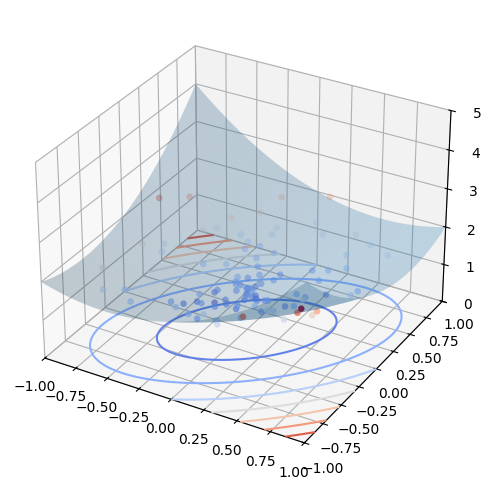

In [26]:
# Requerimientos
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Función potencial
plot_fn = lambda x,y: 1+x**2+y**2-x*y

# Creamos mallado
x_real = np.linspace(-1, 1, 100)
y_real = np.linspace(-1, 1, 100)
X,Y = np.meshgrid(x_real, y_real)
Z = plot_fn(X, Y).T

# Creamos puntos aleatorios con ruido
theta = 2 * np.pi * np.random.random(100)
r = 1 * np.random.random(100)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
epsilon = .1 * np.random.randn(100)
z = plot_fn(x, y) + epsilon

# Dibujamos
fig_1 = plt.figure(figsize=(10,6))
ax = fig_1.add_subplot(1,1,1, projection='3d')
## Grid real
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=0, cmap=matplotlib.cm.coolwarm)
## Puntos
ax.scatter(x, y, z, c=z, cmap=matplotlib.cm.coolwarm, linewidth=0.2)
## Configuración ejes
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(0, 5)
plt.show()

## Código

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Callable, Dict, Union, Optional, Tuple
from dataclasses import dataclass
from tqdm.auto import tqdm

# Base Layer class
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    def forward_propagation(self, input_data):
        raise NotImplementedError

    def backward_propagation(self, output_error, learning_rate):
        raise NotImplementedError

# Dense Layer implementation
class DenseLayer(Layer):
    def __init__(self, n_input, n_output, weight_init_scale=0.5):
        super().__init__()
        self.weights = np.random.rand(n_input, n_output) - weight_init_scale
        self.bias = np.random.rand(1, n_output) - weight_init_scale
        self.gradients = {'weights': None, 'bias': None}

    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = np.dot(self.input, self.weights) + self.bias
        return self.output

    def backward_propagation(self, output_error, learning_rate):
        input_error = np.dot(output_error, self.weights.T)

        # Store gradients (for compatibility with optimizers)
        self.gradients['weights'] = np.dot(self.input.T, output_error)
        # Fix: Take mean along batch dimension for bias gradient
        self.gradients['bias'] = np.mean(output_error, axis=0, keepdims=True)

        # Apply learning step
        self.weights -= learning_rate * self.gradients['weights']
        self.bias -= learning_rate * self.gradients['bias']

        return input_error

# Activation Layer implementation
class ActivationLayer(Layer):
    def __init__(self, activation, activation_der):
        super().__init__()
        self.activation = activation
        self.activation_der = activation_der

    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = self.activation(self.input)
        return self.output

    def backward_propagation(self, output_error, learning_rate):
        return self.activation_der(self.input) * output_error

# Activation functions
def sigmoid(z):
    return 1/(1+np.exp(-z))

def sigmoid_der(z):
    return sigmoid(z)*(1-sigmoid(z))

def tanh(z):
    return np.tanh(z)

def tanh_der(z):
    return 1-np.tanh(z)**2

def relu(z):
    return np.maximum(0, z)

def relu_der(z):
    y = z.copy()
    y[z<0] = 0
    y[z>=0] = 1
    return y

def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

def leaky_relu_der(z, alpha=0.01):
    y = z.copy()
    y[z<0] = alpha
    y[z>=0] = 1
    return y

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=-1, keepdims=True))  # Subtract max for numerical stability
    return exp_z / np.sum(exp_z, axis=-1, keepdims=True)

# Loss functions
def mse(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred, 2))

def mse_der(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size

def categorical_crossentropy(y_true, y_pred):
    y_pred = softmax(y_pred)  # Apply softmax if not already applied
    return -np.sum(y_true * np.log(y_pred + 1e-8))

def categorical_crossentropy_der(y_true, y_pred):
    return softmax(y_pred) - y_true

# Learning rate schedulers
class LearningRateScheduler:
    def __init__(self, initial_lr: float = 0.01):
        self.initial_lr = initial_lr
        self.current_lr = initial_lr

    def step(self, epoch=None, step=None):
        pass

    def get_lr(self):
        return self.current_lr

class ConstantLR(LearningRateScheduler):
    def step(self, epoch=None, step=None):
        pass  # Keep the learning rate constant

class StepLR(LearningRateScheduler):
    def __init__(self, initial_lr: float = 0.01, step_size: int = 10, gamma: float = 0.1):
        super().__init__(initial_lr)
        self.step_size = step_size
        self.gamma = gamma

    def step(self, epoch=None, step=None):
        if epoch is not None and epoch > 0 and epoch % self.step_size == 0:
            self.current_lr = self.current_lr * self.gamma

class ExponentialLR(LearningRateScheduler):
    def __init__(self, initial_lr: float = 0.01, gamma: float = 0.95):
        super().__init__(initial_lr)
        self.gamma = gamma

    def step(self, epoch=None, step=None):
        if epoch is not None:
            self.current_lr = self.initial_lr * (self.gamma ** epoch)

# A simple metric tracker
class MetricTracker:
    def __init__(self):
        self.metrics = {}

    def update(self, metric_name, value):
        if metric_name not in self.metrics:
            self.metrics[metric_name] = []
        self.metrics[metric_name].append(value)

    def get_latest(self, metric_name):
        if metric_name in self.metrics and self.metrics[metric_name]:
            return self.metrics[metric_name][-1]
        return None

    def get_all(self, metric_name):
        return self.metrics.get(metric_name, [])

    def reset(self):
        self.metrics = {}

# Data batch generator
def batch_generator(X, y, batch_size=32, shuffle=True):
    n_samples = X.shape[0]
    indices = np.arange(n_samples)

    if shuffle:
        np.random.shuffle(indices)

    for start_idx in range(0, n_samples, batch_size):
        batch_indices = indices[start_idx:start_idx + batch_size]
        yield X[batch_indices], y[batch_indices]

# Accelerate-compatible Neural Network class
class NeuralNetwork:
    def __init__(self, seed=42):
        self.layers = []
        self.loss = None
        self.loss_der = None
        # Initialize accelerator
        self.metric_tracker = MetricTracker()

    def add(self, layer):
        self.layers.append(layer)

    def set_loss(self, loss, loss_der):
        self.loss = loss
        self.loss_der = loss_der

    def predict(self, input_data):
        # Forward propagation
        output = input_data
        for layer in self.layers:
            output = layer.forward_propagation(output)
        return output

    def _forward_pass(self, X):
        output = X
        for layer in self.layers:
            output = layer.forward_propagation(output)
        return output

    def _backward_pass(self, y_true, y_pred, learning_rate):
        # Calculate initial error
        error = self.loss_der(y_true, y_pred)

        # Backpropagate through layers
        for layer in reversed(self.layers):
            error = layer.backward_propagation(error, learning_rate)

    def train_step(self, X_batch, y_batch, learning_rate):
        # Forward pass
        y_pred = self._forward_pass(X_batch)

        # Calculate loss
        loss_value = self.loss(y_batch, y_pred)

        # Backward pass
        self._backward_pass(y_batch, y_pred, learning_rate)

        return loss_value, y_pred

    def train(self,
              X_train, y_train,
              epochs=100,
              batch_size=32,
              lr_scheduler=None,
              validation_data=None,
              metrics_interval=100,
              verbose=1):
        """
        Flexible training loop with support for:
        - Backpropagation
        - Learning rate scheduling
        - Metric tracking at specified intervals
        - Validation evaluation

        Parameters:
        -----------
        X_train : np.ndarray
            Training features
        y_train : np.ndarray
            Training labels
        epochs : int
            Number of training epochs
        batch_size : int
            Batch size for mini-batch gradient descent
        lr_scheduler : LearningRateScheduler
            Learning rate scheduler
        validation_data : tuple
            (X_val, y_val) for validation
        metrics_interval : int
            Interval (in steps) to compute and log metrics
        verbose : int
            Verbosity level (0, 1, or 2)
        """
        # Initialize learning rate scheduler if not provided
        if lr_scheduler is None:
            lr_scheduler = ConstantLR(initial_lr=0.01)

        n_samples = X_train.shape[0]
        n_batches = int(np.ceil(n_samples / batch_size))
        total_steps = epochs * n_batches

        # Training loop with tqdm progress bar
        with tqdm(total=total_steps, disable=verbose==0) as pbar:
            step_count = 0

            for epoch in range(epochs):
                # Update learning rate at epoch level
                lr_scheduler.step(epoch=epoch)
                epoch_loss = 0

                # Create batches
                for X_batch, y_batch in batch_generator(X_train, y_train, batch_size):
                    # Get current learning rate
                    current_lr = lr_scheduler.get_lr()

                    # Perform training step
                    batch_loss, batch_pred = self.train_step(X_batch, y_batch, current_lr)
                    epoch_loss += batch_loss

                    # Update metrics at specified intervals
                    if step_count % metrics_interval == 0 or step_count == total_steps - 1:
                        # Log training metrics
                        self.metric_tracker.update('train_loss', batch_loss)

                        # Compute validation metrics if provided
                        if validation_data is not None:
                            X_val, y_val = validation_data
                            val_pred = self.predict(X_val)
                            val_loss = self.loss(y_val, val_pred)
                            self.metric_tracker.update('val_loss', val_loss)

                            # Update progress bar with validation info
                            if verbose >= 1:
                                pbar.set_postfix({
                                    'epoch': f"{epoch+1}/{epochs}",
                                    'train_loss': f"{batch_loss:.4f}",
                                    'val_loss': f"{val_loss:.4f}",
                                    'lr': f"{current_lr:.6f}"
                                })
                        else:
                            # Update progress bar without validation
                            if verbose >= 1:
                                pbar.set_postfix({
                                    'epoch': f"{epoch+1}/{epochs}",
                                    'train_loss': f"{batch_loss:.4f}",
                                    'lr': f"{current_lr:.6f}"
                                })

                    # Update step counter and progress bar
                    step_count += 1
                    pbar.update(1)

                # Compute average epoch loss
                epoch_loss /= n_batches

                # Print epoch summary if verbose level is high
                if verbose >= 2:
                    val_info = ""
                    if validation_data is not None:
                        val_loss = self.metric_tracker.get_latest('val_loss')
                        val_info = f" - val_loss: {val_loss:.4f}"

                    print(f"Epoch {epoch+1}/{epochs} - loss: {epoch_loss:.4f}{val_info} - lr: {current_lr:.6f}")

        return self.metric_tracker.metrics

    def plot_metrics(self, metric_names=None, figsize=(12, 6)):
        """Plot training metrics"""
        if metric_names is None:
            metric_names = list(self.metric_tracker.metrics.keys())

        plt.figure(figsize=figsize)
        for metric_name in metric_names:
            values = self.metric_tracker.get_all(metric_name)
            if values:
                plt.plot(values, label=metric_name)

        plt.title('Training Metrics')
        plt.xlabel('Steps (per metrics_interval)')
        plt.ylabel('Value')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.show()

## Test

  3%|▎         | 40/1250 [00:00<00:01, 644.43it/s, epoch=2/50, train_loss=39.5972, val_loss=206.9424, lr=0.000099]

100%|██████████| 1250/1250 [00:01<00:00, 823.62it/s, epoch=50/50, train_loss=4.1832, val_loss=60.6952, lr=0.000061] 


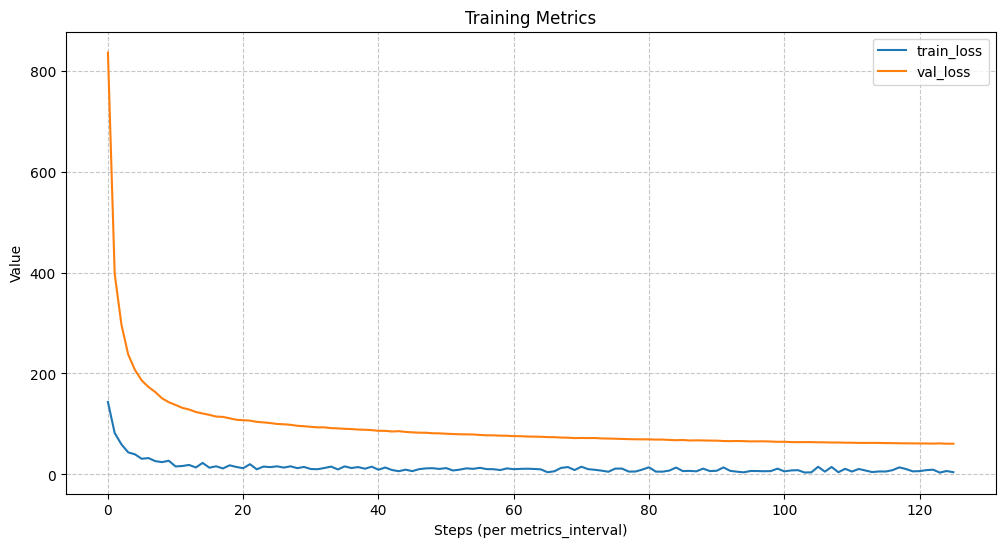

In [35]:
# Create a sample dataset
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate a binary classification problem
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5, random_state=42)

# Convert to one-hot encoding
y_onehot = np.zeros((y.size, np.unique(y).size))
y_onehot[np.arange(y.size), y] = 1

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Create a neural network
nn = NeuralNetwork(seed=42)

# Add layers
nn.add(DenseLayer(20, 128))                      # Input layer
nn.add(ActivationLayer(relu, relu_der))         # Activation
nn.add(DenseLayer(128, 64))                      # Hidden layer
nn.add(ActivationLayer(relu, relu_der))         # Activation
nn.add(DenseLayer(64, 32))                      # Hidden layer
nn.add(ActivationLayer(relu, relu_der))         # Activation
nn.add(DenseLayer(32, 2))                       # Output layer

# Set loss function
nn.set_loss(categorical_crossentropy, categorical_crossentropy_der)

# Create a learning rate scheduler
lr_scheduler = ExponentialLR(initial_lr=0.0001, gamma=0.99)

# Train the network
history = nn.train(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    lr_scheduler=lr_scheduler,
    validation_data=(X_val, y_val),
    metrics_interval=10,
    verbose=1
)

# Plot training metrics
nn.plot_metrics()